# Data Loading

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
#import Dataset
df = pd.read_csv("SMGR.JK.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,1745.144653,1755.116943,1745.144653,1745.144653,1061.532593,210584
1,2005-09-30,1814.950439,1824.922729,1745.144653,1814.950439,1103.993896,5294690
2,2005-10-03,1795.005859,1814.950439,1785.033691,1795.005859,1091.862183,315876
3,2005-10-04,1824.922729,1824.922729,1824.922729,1824.922729,1110.059692,80222
4,2005-10-05,1814.950439,1824.922729,1814.950439,1814.950439,1103.993896,230639
...,...,...,...,...,...,...,...
4602,2024-05-21,4000.000000,4080.000000,3980.000000,3990.000000,3990.000000,20008900
4603,2024-05-22,3980.000000,4030.000000,3900.000000,3950.000000,3950.000000,21807200
4604,2024-05-27,3910.000000,3990.000000,3760.000000,3760.000000,3760.000000,42613300
4605,2024-05-28,3780.000000,3860.000000,3760.000000,3780.000000,3780.000000,20602200


# Data Understanding

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,1745.144653,1755.116943,1745.144653,1745.144653,1061.532593,210584
1,2005-09-30,1814.950439,1824.922729,1745.144653,1814.950439,1103.993896,5294690
2,2005-10-03,1795.005859,1814.950439,1785.033691,1795.005859,1091.862183,315876
3,2005-10-04,1824.922729,1824.922729,1824.922729,1824.922729,1110.059692,80222
4,2005-10-05,1814.950439,1824.922729,1814.950439,1814.950439,1103.993896,230639


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
4602,2024-05-21,4000.0,4080.0,3980.0,3990.0,3990.0,20008900
4603,2024-05-22,3980.0,4030.0,3900.0,3950.0,3950.0,21807200
4604,2024-05-27,3910.0,3990.0,3760.0,3760.0,3760.0,42613300
4605,2024-05-28,3780.0,3860.0,3760.0,3780.0,3780.0,20602200
4606,2024-05-29,3780.0,3780.0,3740.0,3770.0,3770.0,2716500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4607 non-null   object 
 1   Open       4607 non-null   float64
 2   High       4607 non-null   float64
 3   Low        4607 non-null   float64
 4   Close      4607 non-null   float64
 5   Adj Close  4607 non-null   float64
 6   Volume     4607 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 252.1+ KB


Deskripsi Data

1. Date = Merupakan tanggal dimana saham diperdagangkan di pasar saham.
2. Open = Mewakili harga pembukaan saham pada tanggal tertentu. Ini adalah harga di mana suatu saham mulai
3. High = adalah harga tertinggi suatu saham diperdagangkan selama suatu periode. Di sini periodenya adalah satu hari.
4. Low = adalah harga terendah di mana suatu saham diperdagangkan selama suatu periode. Di sini periodenya adalah satu hari.
5. Close = Merupakan harga penutupan saham pada tanggal tertentu. Ini adalah pesanan beli-jual terakhir yang dieksekusi di antara keduanya
6. Adj Close = Harga penutupan yang disesuaikan mengubah harga penutupan saham untuk mencerminkan nilai saham tersebut setelah memperhitungkannya
7. Volume = adalah jumlah saham sekuritas yang diperdagangkan selama periode waktu tertentu. Di sini sekuritasnya adalah stok dan jangka waktu


In [ ]:
#mau melihat data yg unik
df.nunique()

Date         4607
Open          853
High          870
Low           839
Close         863
Adj Close    1945
Volume       4251
dtype: int64

In [ ]:
df.shape

(4607, 7)


Dataset terdiri dari 4607 baris dan 7 kolom

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4.607000e+03
mean,8984.928656,9102.031530,8849.691376,8977.461551,7225.714880,6.529669e+06
std,3831.481079,3871.691815,3781.722881,3826.676734,3211.697639,5.883812e+06
min,378.945679,1755.116943,1720.213989,1740.158447,1058.499512,0.000000e+00
25%,6275.000000,6350.000000,6175.000000,6275.000000,5473.314941,2.968987e+06
50%,9124.613281,9249.266602,8999.959961,9124.613281,7460.761719,5.162824e+06
75%,11368.371094,11517.955078,11168.925781,11368.371094,9481.094727,8.281344e+06
max,18947.285156,19096.869141,18797.701172,18947.285156,14191.507813,7.433695e+07


# Data Checking

In [ ]:
#memeriksa missing value
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


output diatas menunjukkan bahwa tidak ada data yg NaN dalam dataset

In [ ]:
#memeriksa data duplikat
df.duplicated().sum()

0


Output diatas menunjukkan bahwa data tidak ada yg duplikat dalam dataset

In [ ]:
print(df)

            Date         Open         High          Low        Close  \
0     2005-09-29  1745.144653  1755.116943  1745.144653  1745.144653   
1     2005-09-30  1814.950439  1824.922729  1745.144653  1814.950439   
2     2005-10-03  1795.005859  1814.950439  1785.033691  1795.005859   
3     2005-10-04  1824.922729  1824.922729  1824.922729  1824.922729   
4     2005-10-05  1814.950439  1824.922729  1814.950439  1814.950439   
...          ...          ...          ...          ...          ...   
4602  2024-05-21  4000.000000  4080.000000  3980.000000  3990.000000   
4603  2024-05-22  3980.000000  4030.000000  3900.000000  3950.000000   
4604  2024-05-27  3910.000000  3990.000000  3760.000000  3760.000000   
4605  2024-05-28  3780.000000  3860.000000  3760.000000  3780.000000   
4606  2024-05-29  3780.000000  3780.000000  3740.000000  3770.000000   

        Adj Close    Volume  
0     1061.532593    210584  
1     1103.993896   5294690  
2     1091.862183    315876  
3     1110.0596

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4607 non-null   object 
 1   Open       4607 non-null   float64
 2   High       4607 non-null   float64
 3   Low        4607 non-null   float64
 4   Close      4607 non-null   float64
 5   Adj Close  4607 non-null   float64
 6   Volume     4607 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 252.1+ KB


In [ ]:
#memeriksa format tanggal
date_format_correct = pd.to_datetime(df['Date'], errors='coerce').notnull().all()

if date_format_correct :
    print("Format tanggal dalam dataset sesuai.")
else:
    print("Ada nilai yang tidak sesuai format tanggal dalam dataset.")

Format tanggal dalam dataset sesuai.


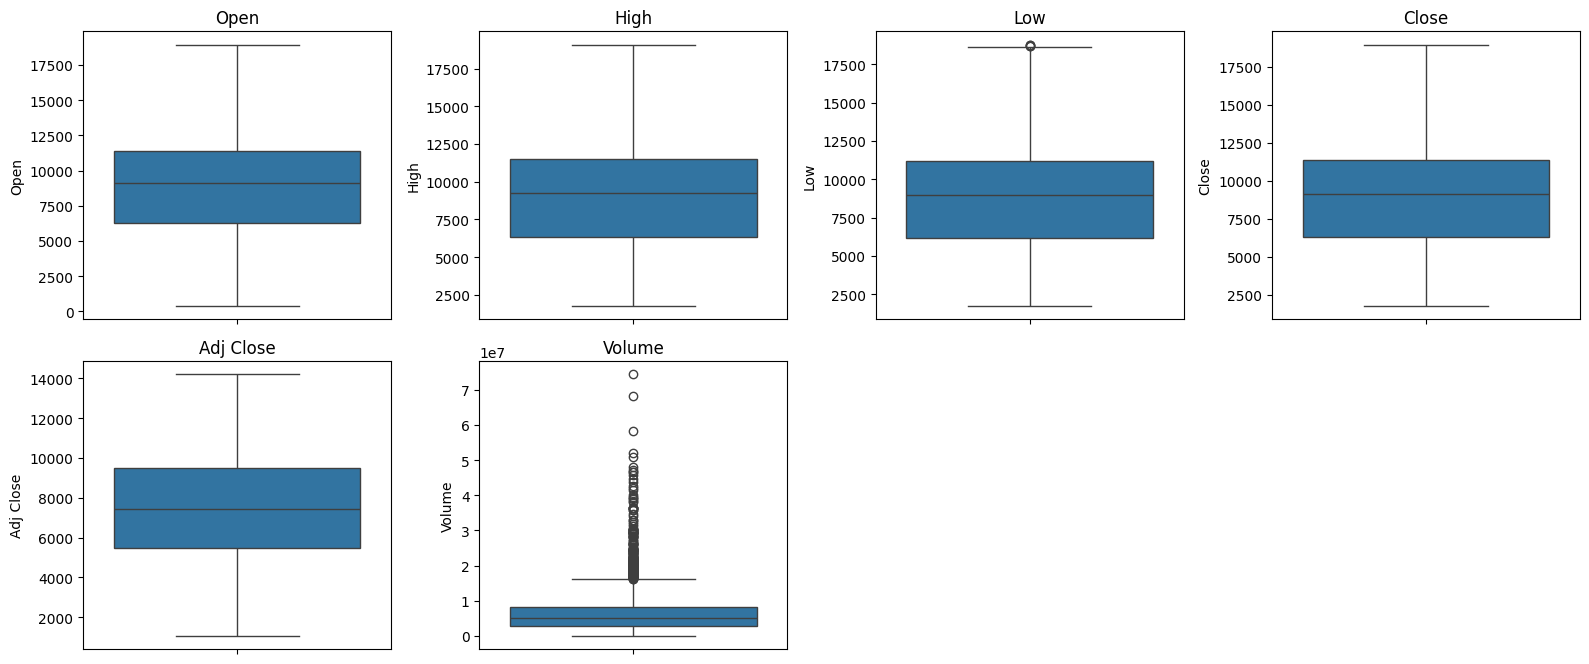

In [ ]:
# cek outlier
plt.figure(figsize=(16, 10))

# Membuat boxplot untuk setiap kolom numerik dalam DataFrame Anda
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
df = df.rename(columns = {
    'Date' : 'date',
    'Open' : 'open',
    'High' : 'high',
    'Low' : 'low',
    'Close' : 'close',
    'Adj Close' : 'adj_close',
    'Volume' : 'volume'
})
df.head(2)

,date,open,high,low,close,adj_close,volume
0,2005-09-29,1745.144653,1755.116943,1745.144653,1745.144653,1061.532593,210584
1,2005-09-30,1814.950439,1824.922729,1745.144653,1814.950439,1103.993896,5294690


# Exploratory Data Analysis

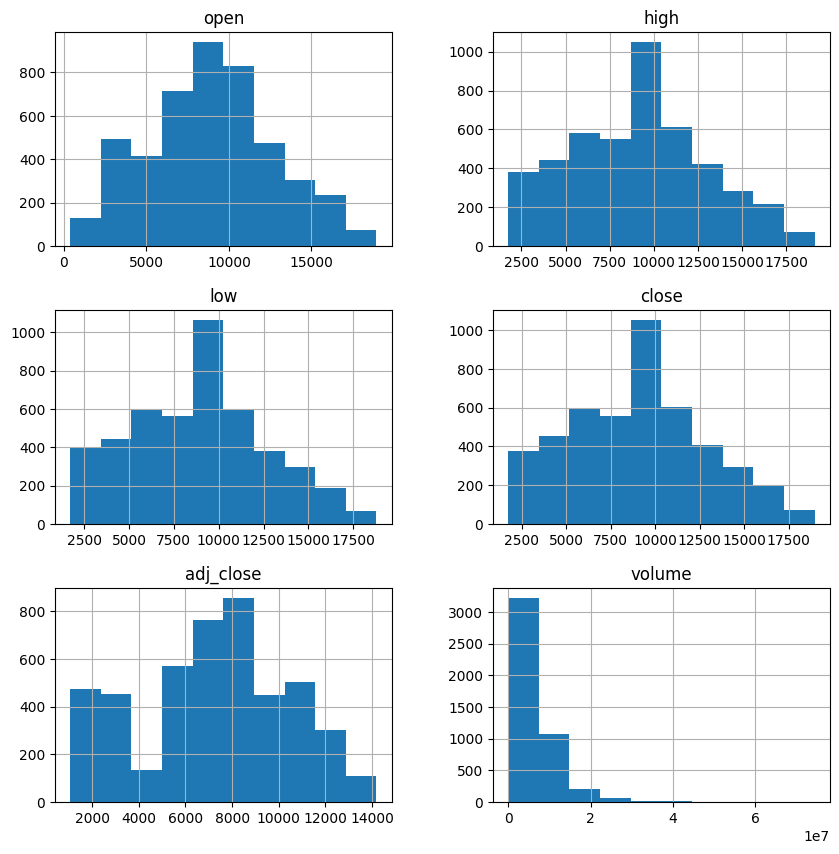

In [ ]:
# Display the histogram
df.hist(figsize=(10, 10))
plt.show()

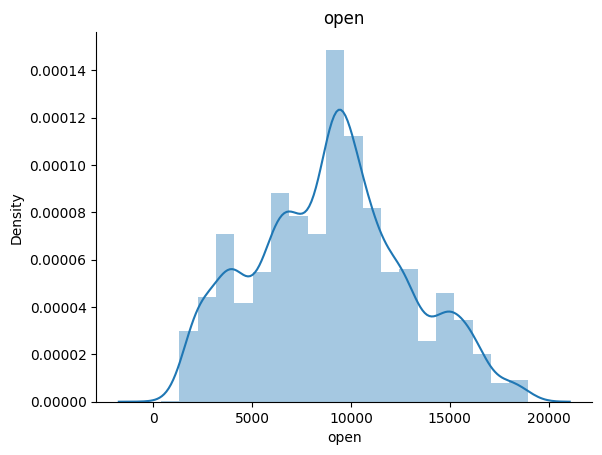

In [ ]:
# Plot the distribution
sns.distplot(df['open'], bins=20)
plt.title('open')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<Axes: xlabel='open', ylabel='close'>

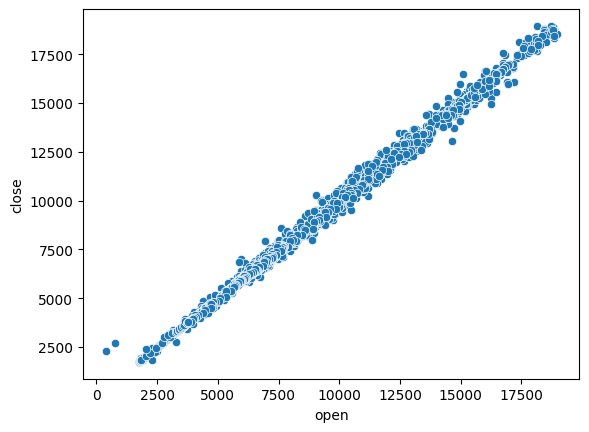

In [ ]:
sns.scatterplot(
    data=df,
    x='open',
    y='close'
)

Scatter plot menunjukkan bahwa ada korelasi positif antara harga “open” dan “close”, yang berarti bahwa ketika harga “open” naik, harga “close” cenderung naik juga

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
print(corr)


               open      high       low     close  adj_close    volume
open       1.000000  0.999259  0.999242  0.998885   0.970387  0.148489
high       0.999259  1.000000  0.999009  0.999392   0.971437  0.157851
low        0.999242  0.999009  1.000000  0.999306   0.970044  0.141655
close      0.998885  0.999392  0.999306  1.000000   0.971160  0.151330
adj_close  0.970387  0.971437  0.970044  0.971160   1.000000  0.181392
volume     0.148489  0.157851  0.141655  0.151330   0.181392  1.000000


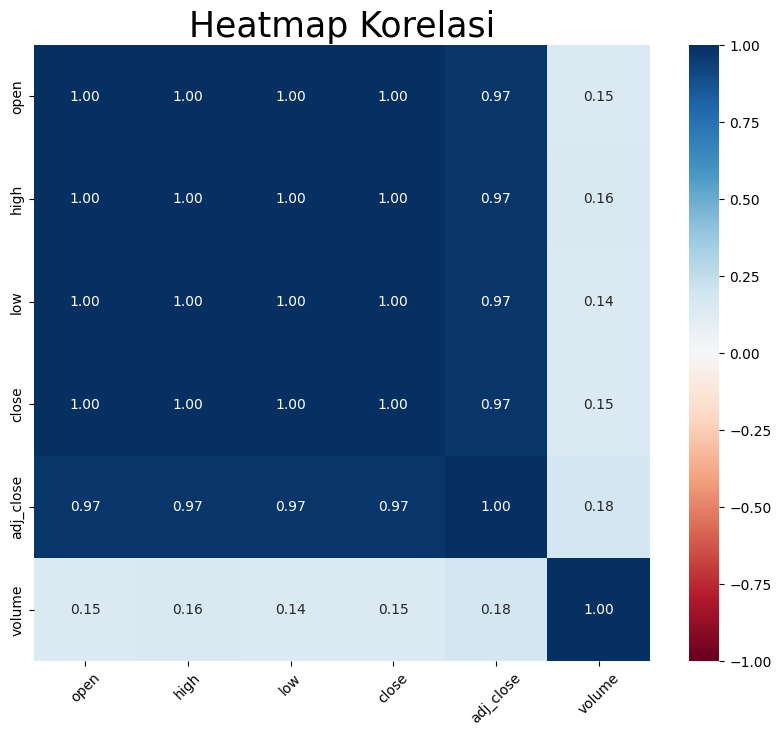

In [ ]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1, square=True)

# Mengatur label sumbu x
plt.xticks(rotation=45)

# Mengatur judul
plt.title('Heatmap Korelasi',size=25)

# Menampilkan plot
plt.show()

Output diatas menunjukkan bahwa Variabel-variabel Open, High, Low, Close, dan Adj Close ini memiliki korelasi yang sangat kuat satu sama lain, ditunjukkan dengan warna biru tua. Ini berarti bahwa ketika harga pembukaan (‘open’) naik, harga tertinggi (‘high’), harga terendah (‘low’), harga penutupan (‘close’), dan harga penutupan disesuaikan (‘adj close’) cenderung naik juga.

Variabel ‘volume’ memiliki korelasi yang lebih lemah dengan variabel lainnya, ditunjukkan dengan warna biru yang lebih muda. Ini berarti bahwa volume perdagangan tidak selalu bergerak seiring dengan perubahan harga.

# Data Prepocessing

Mengubah tipe data yang tidak sesuai

In [ ]:
#Mengubah tipe data kolom 'Date' menjadi datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

In [ ]:
#Mengubah variabel 'Date' menjadi index
df = df.set_index(["date"])


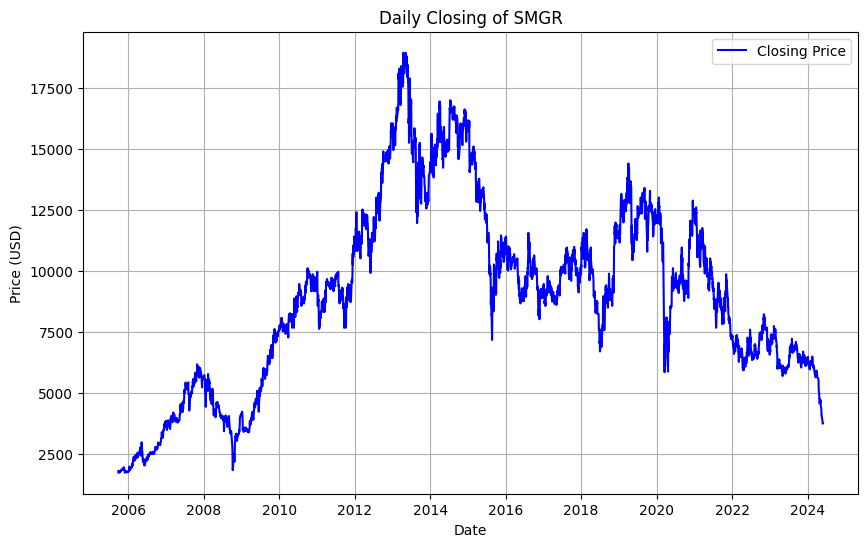

In [ ]:
# Memplot grafik time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], color='blue', label='Closing Price')
plt.title('Daily Closing of SMGR')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Basic Statistic

In [ ]:
df.describe()


,open,high,low,close,adj_close,volume
count,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4.607000e+03
mean,8984.928656,9102.031530,8849.691376,8977.461551,7225.714880,6.529669e+06
std,3831.481079,3871.691815,3781.722881,3826.676734,3211.697639,5.883812e+06
min,378.945679,1755.116943,1720.213989,1740.158447,1058.499512,0.000000e+00
25%,6275.000000,6350.000000,6175.000000,6275.000000,5473.314941,2.968987e+06
50%,9124.613281,9249.266602,8999.959961,9124.613281,7460.761719,5.162824e+06
75%,11368.371094,11517.955078,11168.925781,11368.371094,9481.094727,8.281344e+06
max,18947.285156,19096.869141,18797.701172,18947.285156,14191.507813,7.433695e+07


# Data Modeling

Variable Identification

In [ ]:
y = targets = labels = output_var = df["close"]
X = predictors = input_var = df.loc[:,df.columns != "close"]

Pemilihan variabel 'close' sebagai target dikarenakan prediksi harga penutupan dapat memberikan gambaran tentang kinerja saham pada hari tersebut.

In [ ]:
print("Input Variables", list(X.columns))
print("Output Variable", "['close']")

Input Variables ['open', 'high', 'low', 'adj_close', 'volume']
Output Variable ['close']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4607 entries, 2005-09-29 to 2024-05-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       4607 non-null   float64
 1   high       4607 non-null   float64
 2   low        4607 non-null   float64
 3   close      4607 non-null   float64
 4   adj_close  4607 non-null   float64
 5   volume     4607 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 251.9 KB


In [ ]:
datatype = df.dtypes
#col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : []
Numerical Columns : ['open', 'high', 'low', 'close', 'adj_close', 'volume']


# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3685, 5) (922, 5) (3685,) (922,)


# Prediksi

In [ ]:
# Fungsi evaluasi model
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R^2 Score: {r2}')


In [ ]:
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.4, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training the model for each scenario
model_lr_60 = LinearRegression()
model_lr_60.fit(X_train_60, y_train_60)
test_pred_lr_default_60 = model_lr_60.predict(X_test_60)

model_lr_70 = LinearRegression()
model_lr_70.fit(X_train_70, y_train_70)
test_pred_lr_default_70 = model_lr_70.predict(X_test_70)

model_lr_80 = LinearRegression()
model_lr_80.fit(X_train_80, y_train_80)
test_pred_lr_default_80 = model_lr_80.predict(X_test_80)
# Menyiapkan list untuk menyimpan hasil evaluasi
results_lr = []

# Skenario 1: (60:40)
results_lr.append([
    'Linear Regression (Default, 60:40)',
    mean_absolute_error(y_test_60, test_pred_lr_default_60),
    mean_squared_error(y_test_60, test_pred_lr_default_60),
    np.sqrt(mean_squared_error(y_test_60, test_pred_lr_default_60)),
    r2_score(y_test_60, test_pred_lr_default_60)
])

# Skenario 2: (70:30)
results_lr.append([
    'Linear Regression (Default, 70:30)',
    mean_absolute_error(y_test_70, test_pred_lr_default_70),
    mean_squared_error(y_test_70, test_pred_lr_default_70),
    np.sqrt(mean_squared_error(y_test_70, test_pred_lr_default_70)),
    r2_score(y_test_70, test_pred_lr_default_70)
])

# Skenario 3: (80:20)
results_lr.append([
    'Linear Regression (Default, 80:20)',
    mean_absolute_error(y_test_80, test_pred_lr_default_80),
    mean_squared_error(y_test_80, test_pred_lr_default_80),
    np.sqrt(mean_squared_error(y_test_80, test_pred_lr_default_80)),
    r2_score(y_test_80, test_pred_lr_default_80)
])

# Membuat DataFrame untuk hasil Regresi Linear
results_lr_df = pd.DataFrame(results_lr, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
print("Hasil Evaluasi Regresi Linear:")
print(results_lr_df)


Hasil Evaluasi Regresi Linear:
                                Model        MAE           MSE        RMSE  \
0  Linear Regression (Default, 60:40)  74.703865  11380.505029  106.679450   
1  Linear Regression (Default, 70:30)  74.585437  11418.999977  106.859721   
2  Linear Regression (Default, 80:20)  76.242557  11992.970639  109.512422   

   R2 Square  
0   0.999241  
1   0.999240  
2   0.999200  


In [ ]:
model_nn_60 = MLPRegressor(random_state=42)
model_nn_60.fit(X_train_60, y_train_60)
test_pred_nn_default_60 = model_nn_60.predict(X_test_60)

model_nn_70 = MLPRegressor(random_state=42)
model_nn_70.fit(X_train_70, y_train_70)
test_pred_nn_default_70 = model_nn_70.predict(X_test_70)

model_nn_80 = MLPRegressor(random_state=42)
model_nn_80.fit(X_train_80, y_train_80)
test_pred_nn_default_80 = model_nn_80.predict(X_test_80)

# Menyiapkan list untuk menyimpan hasil evaluasi
results_nn = []

# Skenario 1: (60:40)
results_nn.append([
    'Neural Network (Default, 60:40)',
    mean_absolute_error(y_test_60, test_pred_nn_default_60),
    mean_squared_error(y_test_60, test_pred_nn_default_60),
    np.sqrt(mean_squared_error(y_test_60, test_pred_nn_default_60)),
    r2_score(y_test_60, test_pred_nn_default_60)
])

# Skenario 2: (70:30)
results_nn.append([
    'Neural Network (Default, 70:30)',
    mean_absolute_error(y_test_70, test_pred_nn_default_70),
    mean_squared_error(y_test_70, test_pred_nn_default_70),
    np.sqrt(mean_squared_error(y_test_70, test_pred_nn_default_70)),
    r2_score(y_test_70, test_pred_nn_default_70)
])

# Skenario 3: (80:20)
results_nn.append([
    'Neural Network (Default, 80:20)',
    mean_absolute_error(y_test_80, test_pred_nn_default_80),
    mean_squared_error(y_test_80, test_pred_nn_default_80),
    np.sqrt(mean_squared_error(y_test_80, test_pred_nn_default_80)),
    r2_score(y_test_80, test_pred_nn_default_80)
])

# Membuat DataFrame untuk hasil Jaringan Saraf
results_nn_df = pd.DataFrame(results_nn, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
print("\nHasil Evaluasi Jaringan Saraf (Neural Network):")
print(results_nn_df)



Hasil Evaluasi Jaringan Saraf (Neural Network):
                             Model         MAE           MSE        RMSE  \
0  Neural Network (Default, 60:40)  109.666572  25133.758489  158.536300   
1  Neural Network (Default, 70:30)   83.976414  13937.390794  118.056727   
2  Neural Network (Default, 80:20)   89.602594  15735.755713  125.442241   

   R2 Square  
0   0.998324  
1   0.999072  
2   0.998950  


In [ ]:
# Menggabungkan hasil evaluasi Regresi Linear dan Jaringan Saraf ke dalam satu DataFrame
results_comparison = pd.concat([results_lr_df, results_nn_df], ignore_index=True)

print("\nPerbandingan Hasil Evaluasi Regresi Linear dan Jaringan Saraf:")
print(results_comparison)



Perbandingan Hasil Evaluasi Regresi Linear dan Jaringan Saraf:
                                Model         MAE           MSE        RMSE  \
0  Linear Regression (Default, 60:40)   74.703865  11380.505029  106.679450   
1  Linear Regression (Default, 70:30)   74.585437  11418.999977  106.859721   
2  Linear Regression (Default, 80:20)   76.242557  11992.970639  109.512422   
3     Neural Network (Default, 60:40)  109.666572  25133.758489  158.536300   
4     Neural Network (Default, 70:30)   83.976414  13937.390794  118.056727   
5     Neural Network (Default, 80:20)   89.602594  15735.755713  125.442241   

   R2 Square  
0   0.999241  
1   0.999240  
2   0.999200  
3   0.998324  
4   0.999072  
5   0.998950  
